# Análise KDD 2009
O arquivo de dados contém 230 variáveis em 50.000 exemplos. As primeiras 190 variáveis são numéricas (como idade, altura etc) e as últimas 40 são categóricas (como sexo, cidade etc).

### Formato dos dados

O dataset usa um formato similar ao formato de exportação de bases de dados relacionais:

Uma linha de cabeçalho com os nomes das variáveis
Uma linha por exemplo de dado
Separação de valores por tabulação
Há válores (variáveis) que não estão presentes (ou seja, que aparecem como tabs consecutivos)

O valor de objetivo (arquivos .label) tem apenas um exemplo por linha na mesma ordem dos arquivos de dados correspondentes. Note que churn, appetency e up-selling são tres problemas de classificação binária distintos. Os valores objetivo são +1 ou -1. Nos referimos aos exemplos +1 como exemplos positivos e -1 como exemplos negativos.

### Explorando os dados
A primeira etapa consiste em ler os dados dos arquivos originais e derivar informações sobre estes dados: origem, significado, consistência etc.

Os dados estão separados por tab, com cabeçalho e há claramente dados faltantes. Uma busca no arquivo de entrada, com o comando:

`grep -i "[[:space:]]NA[[:space:]]" <arquivo>`

indicou que os dados faltantes não estão marcados com NA (típico *"Not Available"* (não disponível) de dados codificados em inglês.

Também verificamos que há brancos em todas as linhas, os comandos
- `grep "[[:space:]][[:space:]]" *.data | wc -l`
- `grep -P "\t\t" *.data | wc -l`

retornaram 50.000.

Os dados em branco podem estar distribuídos em várias variáveis (por exemplo: entre várias variáveis muito esparsas) ou em apenas uma variável (nesse ponto não podemos descatar a possibilidade de uma variável não conter nenhum valor). Em sendo o primeiro caso (brancos distribuídos entre várias variáveis) é bem provável que a ausência de dados seja de origem sistêmica (ou seja, parte do próprio processo de coleta de dados). De qualquer forma, como não temos informações sobre a curagem dos dados (sua origem, significado e transformações que sofreram antes de chegar às nossas mãos), é bem provável que tenhamos que assumir, mais tarde, que as ausências de dados são realmente sistêmicas.

### Que linguagem/ambiente adotar?
Por enquanto ainda não temos um entendimento claro do problema a ser abordado mas as principais opções são R e python. Vamos iniciar a análise dos dados em R porém não descartamos a possibilidade de mudar para python, antes de prosseguir na escolha do método e modelo a utilizar, caso a decisão faça sentido no contexto do projeto. Porém esta transição deve ser executada ainda nos passos iniciais do projeto, para não nos obrigar um esforço grande de recodificação.

In [1]:
dados <- read.table('orange_small_train.data', sep='\t', header=T, na.strings=c(''))

In [2]:
summary(dados)

      Var1             Var2            Var3               Var4      
 Min.   :  0.00   Min.   :0       Min.   :     0.0   Min.   : 0.00  
 1st Qu.:  0.00   1st Qu.:0       1st Qu.:     0.0   1st Qu.: 0.00  
 Median :  0.00   Median :0       Median :     0.0   Median : 0.00  
 Mean   : 11.49   Mean   :0       Mean   :   425.3   Mean   : 0.13  
 3rd Qu.: 16.00   3rd Qu.:0       3rd Qu.:     0.0   3rd Qu.: 0.00  
 Max.   :680.00   Max.   :5       Max.   :130668.0   Max.   :27.00  
 NA's   :49298    NA's   :48759   NA's   :48760      NA's   :48421  
      Var5              Var6             Var7           Var8        
 Min.   :      0   Min.   :     0   Min.   :  0.000   Mode:logical  
 1st Qu.:      0   1st Qu.:   518   1st Qu.:  0.000   NA's:50000    
 Median :      0   Median :   861   Median :  7.000                 
 Mean   : 238793   Mean   :  1326   Mean   :  6.809                 
 3rd Qu.: 118742   3rd Qu.:  1428   3rd Qu.:  7.000                 
 Max.   :6048550   Max.   :131761 

In [3]:
head(dados)

Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,⋯,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
NA,NA,NA,NA,NA,1526,7,NA,NA,NA,⋯,oslk,fXVEsaq,jySVZNlOJy,NA,NA,xb3V,RAYp,F2FyR07IdsN7I,NA,NA
NA,NA,NA,NA,NA,525,0,NA,NA,NA,⋯,oslk,2Kb5FSF,LM8l689qOp,NA,NA,fKCe,RAYp,F2FyR07IdsN7I,NA,NA
NA,NA,NA,NA,NA,5236,7,NA,NA,NA,⋯,Al6ZaUT,NKv4yOc,jySVZNlOJy,NA,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NA
NA,NA,NA,NA,NA,NA,0,NA,NA,NA,⋯,oslk,CE7uk3u,LM8l689qOp,NA,NA,FSa2,RAYp,F2FyR07IdsN7I,NA,NA
NA,NA,NA,NA,NA,1029,7,NA,NA,NA,⋯,oslk,1J2cvxe,LM8l689qOp,NA,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NA
NA,NA,NA,NA,NA,658,7,NA,NA,NA,⋯,zCkv,QqVuch3,LM8l689qOp,NA,NA,Qcbd,02N6s8f,Zy3gnGM,am7c,NA


# Breve revisão dos dados
Nesse primeiro passo vemos que há uma grande quantidade de váriaveis com um número excessivo de NAs, por exemplo:

- **`Var1`: 50.000 ocorrências, 49.298 NAs (98,6%). Média 11,49, Mediana: 0.**
- **`Var5`: 50.000 ocorrências, 48.513 NAs (97%). Média 238.793, Mediana: 0.**
- **`Var43`: 50.000 ocorrências, 48.759 NAs (97,5%). Média 4,16, Mediana: 0.**
- **`Var190`: 50.000 ocorrências, 49.667 NAs (93,33%). Média: 22.007, Mediana: 12669.**

Há também dados com quantidades aceitáveis de NAs:

- **`Var24`: 50000 ocorrências, 7.230 NAs (14,5%). Média 4,508, Mediana: 2.**
- **`Var192`: 50000 ocorrências, 369 NAs (0,74%).**

Dados completamente preenchidos:
- **`Var57`: 50000 ocorrências, 0 NAs. Média 3,512311, Mediana: 3.514740. **
- **`Var207`: 50000 ocorrências, 0 NAs.**

E dados sem valores:
- **`Var8`: 50000 ocorrências, 50.000 NAs. Mode: logical**
- **`Var15`: 50000 ocorrências, 50.000 NAs. Mode: logical**
- **`Var230`: 50000 ocorrências, 50.000 NAs. Mode: logical**


O dataset pede uma análise mais detalhada das 230 variáveis, que deve ser feita de forma automática, para decidir que variáveis permanecem no modelo e que alterações podemos fazer nos dados antes de prosseguir com o projeto.

Nos casos em que os NAs aparecem em variáveis categóricas pode ser favorável tratar estes NAs como mais uma categoria da variável, de acordo com a quantidade e representatividade dos mesmos para a variável em questão.

Outra questão é que não há nenhum contexto sobre os dados, as colunas tem nomes sem signficado (Var1, Var2 ...) e os valores categóricos foram recodificados (Por exemplo, para `Var256` os valores são `xb3V fKCe Qu4f` etc) portanto será necessário seguir adiante sem fazer nenhuma suposição sobre o seu conteúdo e como as variáveis (colunas) podem estar relacionadas.

### Sumário
Há um número grande de variáveis e várias delas com um número grande de níveis possíveis. O KDD indica o uso de AUC (Área Sob a Curva) como método de avaliação, que é razoávelmente suscetível a overfitting. Para diminuir um pouco essa tandência deve valer a pena utilizar parte dos dados de treino para treino e parte para testes. Os dados de testes (que estão separados em outro arquivo) não possuem label portando serão usados apenas para previsões do modelo.

# Rótulos

Os tres rótulos, appetency, churn e upselling, serão incluídos nos dados como colunas adicionais.

In [4]:
# Leitura dos rótulos dos dados
appetency <- read.table('orange_small_train_appetency.labels', sep='\t', header=F, col.names=c("appetency"))
churn <- read.table('orange_small_train_churn.labels', sep='\t', header=F, col.names=c("churn"))
upselling <- read.table('orange_small_train_upselling.labels', sep='\t', header=F, col.names=c("upselling"))

In [5]:
# Revisão dos rótulos
head(churn)
head(appetency)
head(upselling)

churn
-1
1
-1
-1
-1
-1


appetency
-1
-1
-1
-1
-1
-1


upselling
-1
-1
-1
-1
-1
-1


A inclusão deve ser feita como:
```
appetency$appetency
churn$churn
upselling$upselling
```

De acordo com a documentação dos dados, -1 significa negativo para a categoria e 1 positivo para a categoria.

In [6]:
# Inclusão dos rótulos no conjunto de dados como colunas adicionais
dados$appetency <- appetency$appetency
dados$churn <- churn$churn
dados$upselling <- upselling$upselling

In [7]:
# Colunas de resultado
resultados <- c("appetency", "churn", "upselling")

In [8]:
# Colunas de variaveis
variaveis <- setdiff(colnames(dados), resultados)

In [9]:
variaveis

[1] "Var1"   "Var2"   "Var3"   "Var4"   "Var5"   "Var6"   "Var7"   "Var8"  
  [9] "Var9"   "Var10"  "Var11"  "Var12"  "Var13"  "Var14"  "Var15"  "Var16" 
 [17] "Var17"  "Var18"  "Var19"  "Var20"  "Var21"  "Var22"  "Var23"  "Var24" 
 [25] "Var25"  "Var26"  "Var27"  "Var28"  "Var29"  "Var30"  "Var31"  "Var32" 
 [33] "Var33"  "Var34"  "Var35"  "Var36"  "Var37"  "Var38"  "Var39"  "Var40" 
 [41] "Var41"  "Var42"  "Var43"  "Var44"  "Var45"  "Var46"  "Var47"  "Var48" 
 [49] "Var49"  "Var50"  "Var51"  "Var52"  "Var53"  "Var54"  "Var55"  "Var56" 
 [57] "Var57"  "Var58"  "Var59"  "Var60"  "Var61"  "Var62"  "Var63"  "Var64" 
 [65] "Var65"  "Var66"  "Var67"  "Var68"  "Var69"  "Var70"  "Var71"  "Var72" 
 [73] "Var73"  "Var74"  "Var75"  "Var76"  "Var77"  "Var78"  "Var79"  "Var80" 
 [81] "Var81"  "Var82"  "Var83"  "Var84"  "Var85"  "Var86"  "Var87"  "Var88" 
 [89] "Var89"  "Var90"  "Var91"  "Var92"  "Var93"  "Var94"  "Var95"  "Var96" 
 [97] "Var97"  "Var98"  "Var99"  "Var100" "Var101" "Var102" "Var103" "Var104"
[105] "Var105" "Var106" "Var107" "Var108" "Var109" "Var110" "Var111" "Var112"
[113] "Var113" "Var114" "Var115" "Var116" "Var117" "Var118" "Var119" "Var120"
[121] "Var121" "Var122" "Var123" "Var124" "Var125" "Var126" "Var127" "Var128"
[129] "Var129" "Var130" "Var131" "Var132" "Var133" "Var134" "Var135" "Var136"
[137] "Var137" "Var138" "Var139" "Var140" "Var141" "Var142" "Var143" "Var144"
[145] "Var145" "Var146" "Var147" "Var148" "Var149" "Var150" "Var151" "Var152"
[153] "Var153" "Var154" "Var155" "Var156" "Var157" "Var158" "Var159" "Var160"
[161] "Var161" "Var162" "Var163" "Var164" "Var165" "Var166" "Var167" "Var168"
[169] "Var169" "Var170" "Var171" "Var172" "Var173" "Var174" "Var175" "Var176"
[177] "Var177" "Var178" "Var179" "Var180" "Var181" "Var182" "Var183" "Var184"
[185] "Var185" "Var186" "Var187" "Var188" "Var189" "Var190" "Var191" "Var192"
[193] "Var193" "Var194" "Var195" "Var196" "Var197" "Var198" "Var199" "Var200"
[201] "Var201" "Var202" "Var203" "Var204" "Var205" "Var206" "Var207" "Var208"
[209] "Var209" "Var210" "Var211" "Var212" "Var213" "Var214" "Var215" "Var216"
[217] "Var217" "Var218" "Var219" "Var220" "Var221" "Var222" "Var223" "Var224"
[225] "Var225" "Var226" "Var227" "Var228" "Var229" "Var230"

# Variáveis categóricas e numéricas
Alguns dos dados são categóricos, de acordo com a documentação seriam as colunas `Var1` até `Var190`, mas é importante automatizar esta separação para reduzir riscos de erro de codificação nos arquivos de entrada.

In [10]:
variaveisCategoricas <- variaveis[sapply(dados[,variaveis], class) %in% c('factor', 'character')]

In [11]:
variaveisCategoricas

[1] "Var191" "Var192" "Var193" "Var194" "Var195" "Var196" "Var197" "Var198"
 [9] "Var199" "Var200" "Var201" "Var202" "Var203" "Var204" "Var205" "Var206"
[17] "Var207" "Var208" "Var210" "Var211" "Var212" "Var213" "Var214" "Var215"
[25] "Var216" "Var217" "Var218" "Var219" "Var220" "Var221" "Var222" "Var223"
[33] "Var224" "Var225" "Var226" "Var227" "Var228" "Var229"

In [12]:
variaveisNumericas <- variaveis[sapply(dados[,variaveis], class) %in% c('numeric', 'integer')]

In [13]:
variaveisNumericas

[1] "Var1"   "Var2"   "Var3"   "Var4"   "Var5"   "Var6"   "Var7"   "Var9"  
  [9] "Var10"  "Var11"  "Var12"  "Var13"  "Var14"  "Var16"  "Var17"  "Var18" 
 [17] "Var19"  "Var21"  "Var22"  "Var23"  "Var24"  "Var25"  "Var26"  "Var27" 
 [25] "Var28"  "Var29"  "Var30"  "Var33"  "Var34"  "Var35"  "Var36"  "Var37" 
 [33] "Var38"  "Var40"  "Var41"  "Var43"  "Var44"  "Var45"  "Var46"  "Var47" 
 [41] "Var49"  "Var50"  "Var51"  "Var53"  "Var54"  "Var56"  "Var57"  "Var58" 
 [49] "Var59"  "Var60"  "Var61"  "Var62"  "Var63"  "Var64"  "Var65"  "Var66" 
 [57] "Var67"  "Var68"  "Var69"  "Var70"  "Var71"  "Var72"  "Var73"  "Var74" 
 [65] "Var75"  "Var76"  "Var77"  "Var78"  "Var80"  "Var81"  "Var82"  "Var83" 
 [73] "Var84"  "Var85"  "Var86"  "Var87"  "Var88"  "Var89"  "Var90"  "Var91" 
 [81] "Var92"  "Var93"  "Var94"  "Var95"  "Var96"  "Var97"  "Var98"  "Var99" 
 [89] "Var100" "Var101" "Var102" "Var103" "Var104" "Var105" "Var106" "Var107"
 [97] "Var108" "Var109" "Var110" "Var111" "Var112" "Var113" "Var114" "Var115"
[105] "Var116" "Var117" "Var118" "Var119" "Var120" "Var121" "Var122" "Var123"
[113] "Var124" "Var125" "Var126" "Var127" "Var128" "Var129" "Var130" "Var131"
[121] "Var132" "Var133" "Var134" "Var135" "Var136" "Var137" "Var138" "Var139"
[129] "Var140" "Var142" "Var143" "Var144" "Var145" "Var146" "Var147" "Var148"
[137] "Var149" "Var150" "Var151" "Var152" "Var153" "Var154" "Var155" "Var156"
[145] "Var157" "Var158" "Var159" "Var160" "Var161" "Var162" "Var163" "Var164"
[153] "Var165" "Var166" "Var168" "Var170" "Var171" "Var172" "Var173" "Var174"
[161] "Var176" "Var177" "Var178" "Var179" "Var180" "Var181" "Var182" "Var183"
[169] "Var184" "Var186" "Var187" "Var188" "Var189" "Var190"

# Variáveis lógicas ou nulas?
Vemos pelo resultado acima que algumas variáveis não são nem numéricas nem categóricas (por exemplo: Var8)

In [14]:
variaveisOutras <- setdiff(variaveis, union(variaveisNumericas, variaveisCategoricas))

In [15]:
summary(dados[variaveisOutras])

   Var8          Var15          Var20          Var31          Var32        
 Mode:logical   Mode:logical   Mode:logical   Mode:logical   Mode:logical  
 NA's:50000     NA's:50000     NA's:50000     NA's:50000     NA's:50000    
  Var39          Var42          Var48          Var52          Var55        
 Mode:logical   Mode:logical   Mode:logical   Mode:logical   Mode:logical  
 NA's:50000     NA's:50000     NA's:50000     NA's:50000     NA's:50000    
  Var79          Var141         Var167         Var169         Var175       
 Mode:logical   Mode:logical   Mode:logical   Mode:logical   Mode:logical  
 NA's:50000     NA's:50000     NA's:50000     NA's:50000     NA's:50000    
  Var185         Var209         Var230       
 Mode:logical   Mode:logical   Mode:logical  
 NA's:50000     NA's:50000     NA's:50000    

# Sumário da revisão dos dados

Os dados parecem ser bastante esparsos e razoavelmente "sujos". Com uma grande quantidade de variáveis nos casos abaixo:
- Variáveis sem valor algum
- Variáveis com poucos valores válidos
- Variáveis com quantidades aceitáveis sem valores, dos tipos:
    - Categórico
    - Numérico

Antes de efetivamente trabalhar em um modelo para classificação dos dados é essencial tratar estes casos. Obviamente as variáveis sem valores devem ser ignoradas, as variáveis com poucos valores válidos também (mas é necessário definir uma estratégia de corte, definindo o que significa a expressão *"poucos valores válidos"* para esse contexto de dados).

A decisão sobre o que fazer com as outras variáveis é um pouco mais delicada, dado o número de variáveis dos dados originais vale a pena pensar em uma alternativa automatizada (mas que não seja ingênua, a ponto de interferir negativamente na capacidade preditiva do modelo a adotar).

A decisão nesse momento é onde investir recursos, já que estes são bastante limitados:
- Em alternativas de modelos e algoritmos, comparando os resultados e escolhendo o mais favorável
- No tratamento de dos dados e aplicar um ou dois métodos.

Como referência, vemos abaixo o resultado dos ganhadores do KDD 2009:

|Rank|Team Name|Method|AUC|
|:----:|:---------|:------|---|
||||Churn|Appetency|Upselling|Score|
|1|	IBM Research|	Final Submission|	0.7611|	0.8830|	0.9038|	0.8493|
|2|	ID Analytics, Inc|	DT|	0.7565|	0.8724|	0.9056|	0.8448|
|3|	Old dogs with new tricks|	Our own method|	0.7541|	0.8740|	0.9050|	0.8443|
|4|	Crusaders|	Joint Score Technique|	0.7569|	0.8688|	0.9034|	0.8430|
|5|	Financial Engineering Group, Inc. Japan|	boosting|	0.7498|	0.8732|	0.9057|	0.8429|

Como os dados foram anonimizados (ou seja, não temos nenhum conhecimento sobre as variáveis, como se relacionam, qual o significado dos valores e se os valores omitidos são sistêmicos, parte do próprio processo de coleta, ou não) teremos que tomar algumas decisões no tratamento dos mesmos sem muitas inferências sobre o seu conteúdo.

Listamos abaixo os problemas mais comuns em entrada de dados e verificamos que vários estão presentes no nosso conjunto de dados:

- Valores numéricos "ruins": NA, NaN, valores sentinela (no nosso caso: predominância de NA)
- Variáveis categóricas
    - Ausência de valores
    - Ausência de níveis (é possível que alguns níveis só apareçam nos dados de testes!)
    - Excesso de níveis
- Valores inválidos (não temos como nos certificar, pela natureza dos dados)
- Valores numéricos fora de limite (também não temos como verificar)
- Níveis de categoria inválidos

### Decisão: Investir no tratamento dos dados
Pela quantidade de inconsistências nos dados de entrada será necessário, de qualquer forma, limpar e ajustar os dados de entrada. Isto pode ser feito com decisões simples e ingênuas, com resultados rápidos ou por um processo mais sistemático e consistente, porém muito mais trabalhoso.

Pela natureza dos dados optamos por investir no tratamento dos dados, deixando a questão do método a utilizar em um segundo plano, quando os dados estiverem adequados para análise.

### Próximos passos
Pelo número de variáveis e inconsistências é importante utilizar alguns dos pacotes disponíveis para o tratamento dos dados faltantes. Abaixo seguem algumas opções em R:

1. Amelia - Assume que o conjunto de dados possui distribuição normal multivariada e utiliza média e covariâncias para sumarizar os dados.
2. Hmisc - Pacote multipropósito que contém várias funções para análise de dados, incluindo imputação de valores ausentes.
3. MICE - Uma alternativa comum em R que assume que as ausências são randômicas (Multivariate Imputation via Chained Equations).
4. missForest - Método não paramétrico que constroi modelos de random forest para cada variável com o objetivo de prever valores ausentes baseado nos existentes.
5. vtreat - Processador/condicionador de data.frames, a fase de preparação é similar ao model.matrix do R. Leva em consideração o resultado no condicionamento (*y-aware*). 

Entre os métodos de tratamento de dados optamos inicialmente pelo vtreat, mantendo o Hmisc como uma segunda alternativa caso o vtreat não demonstre bons resultados. Há um ótimo [paper](https://arxiv.org/pdf/1611.09477) online sobre o vtreat e a sua documentação está disponível no [Cran](https://cran.r-project.org/web/packages/vtreat/index.html).

### Importante
Como referência, criamos outro notebook onde vamos utilizar o modelo preditivo sem alterações nos dados originais, de forma [simplista](./Abordagem_Simplista.ipynb).

# Reiniciando o processo de análise!

In [16]:
# Reiniciando processo. Apagamos todas as variáveis
rm(list=c(ls()))

In [17]:
dados <- read.table('orange_small_train.data', sep='\t', header=T, na.strings=c(''))

In [18]:
# Leitura dos rótulos dos dados
appetency <- read.table('orange_small_train_appetency.labels', sep='\t', header=F, col.names=c("appetency"))
churn <- read.table('orange_small_train_churn.labels', sep='\t', header=F, col.names=c("churn"))
upselling <- read.table('orange_small_train_upselling.labels', sep='\t', header=F, col.names=c("upselling"))

# Inclusão dos rótulos no conjunto de dados como colunas adicionais
dados$appetency <- appetency$appetency
dados$churn <- churn$churn
dados$upselling <- upselling$upselling

In [19]:
# Inclusão de bibliotecas
library('vtreat')
library('ggplot2')
library('parallel')
library('WVPlots')
library('xgboost')
library('Metrics')

# Subdivisão dos dados de treino
Para seguir na avaliação do modelo, vamos dividir os dados de treino em dois grupos. Os dados de testes, que estão em um arquivo separado, serão usados mais tarde para previsões do modelo.

A princípio vamos dividir os dados em um grupo de treinamento com 90% dos dados e os 10% restantes serão utilizados apenas para validação.

In [20]:
# Número total de pontos de dados
numeroDados <- nrow(dados)

# Fixa semente para reproduzir resultados
set.seed(42)

# Define treino como 90% dos dados de treino e
# validação como os 10% restantes
tamanhoTreino <- floor(0.90 * numeroDados)

# Gera uma amostra aleatória com 90% dos índices
indicesTreino <- sample(seq_len(numeroDados), size = tamanhoTreino)

# Divide os dados nos dois subgrupos
# -indicesTreino são os 10% dos índices restantes
dadosTreino <- dados[indicesTreino, ]
dadosValidacao <- dados[-indicesTreino, ]

# Dimensões dos dados de treino e validação
dim(dadosTreino)
dim(dadosValidacao)

[1] 45000   233

[1] 5000  233

In [21]:
head(dadosTreino)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,⋯,Var224,Var225,Var226,Var227,Var228,Var229,Var230,appetency,churn,upselling
45741,NA,NA,NA,NA,NA,875,21,NA,NA,NA,⋯,NA,ELof,rgKb,RAYp,F2FyR07IdsN7I,mj86,NA,-1,-1,-1
46853,NA,NA,NA,NA,NA,3059,7,NA,NA,NA,⋯,NA,kG3k,WqMG,RAYp,55YFVY9,NA,NA,-1,-1,-1
14307,NA,NA,NA,NA,NA,2149,14,NA,NA,NA,⋯,NA,xG3x,fKCe,RAYp,F2FyR07IdsN7I,am7c,NA,-1,-1,-1
41520,NA,NA,NA,NA,NA,350,7,NA,NA,NA,⋯,NA,kG3k,rgKb,RAYp,F2FyR07IdsN7I,am7c,NA,-1,-1,-1
32085,NA,NA,NA,NA,NA,217,0,NA,NA,NA,⋯,NA,NA,szEZ,RAYp,F2FyR07IdsN7I,NA,NA,-1,-1,-1
25953,NA,NA,NA,NA,NA,1141,7,NA,NA,NA,⋯,NA,NA,rgKb,RAYp,F2FyR07IdsN7I,NA,NA,-1,-1,1


In [22]:
head(dadosValidacao)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,⋯,Var224,Var225,Var226,Var227,Var228,Var229,Var230,appetency,churn,upselling
23,NA,NA,NA,NA,NA,826,0,NA,NA,NA,⋯,NA,ELof,453m,RAYp,F2FyR07IdsN7I,mj86,NA,-1,-1,-1
37,NA,NA,NA,NA,NA,1813,0,NA,NA,NA,⋯,NA,NA,szEZ,nIGXDli,F2FyR07IdsN7I,NA,NA,-1,-1,-1
40,NA,NA,NA,NA,NA,1484,7,NA,NA,NA,⋯,NA,NA,Aoh3,02N6s8f,xwM2aC7IdeMC0,NA,NA,-1,1,-1
48,NA,NA,NA,NA,NA,224,0,NA,NA,NA,⋯,NA,NA,Qcbd,RAYp,F2FyR07IdsN7I,NA,NA,-1,-1,-1
84,NA,NA,NA,NA,NA,0,7,NA,NA,NA,⋯,NA,NA,szEZ,RAYp,F2FyR07IdsN7I,mj86,NA,-1,-1,-1
93,NA,NA,NA,NA,NA,140,0,NA,NA,NA,⋯,NA,NA,WqMG,6fzt,SbOd7O8ky1wGNxp0Arj0Xs,NA,NA,-1,-1,-1


In [23]:
# Remove os data frames que não são mais necessários
rm(list=c('dados','churn','appetency','upselling'))
# Cria lista de variáveis, excluindo as colunas de resultados (labels)
resultados <- c('appetency','churn','upselling')
variaveis <- setdiff(colnames(dadosTreino), resultados)

In [24]:
# Verifica número de núcleos e cria cluster de sockets para paralelização no vtreat
nucleos <- parallel::detectCores()
cluster <- parallel::makeCluster(nucleos)
print(cluster)

socket cluster with 4 nodes on host ‘localhost’


# Tratamento de dados

O tratamento de dados do vtreat é y-Aware, ou seja, ele utiliza os labels nos métodos de tratamento dos dados (onde várias variáveis são removidas, outras são corrigidas e duplicadas e variáveis sentinelas são criadas). Portanto é necessário gerar tres políticas de tratamento, uma para cada label (appetency, churn e upselling), que serão utilizadas mais tarde nas previsões.

Para cada um dos labels, executaremos rodadas do método [xgboost](https://xgboost.readthedocs.io/en/latest/) para verificar o melhor parâmetro de rodadas do modelo. Vamos avaliar execuções de 20 a 300 rodadas, com intervalos de 2 (20, 22, 24, ..., 296, 298, 300) e verificar como se comporta o erro do modelo no conjunto de teste de acordo com a métrica do KDD 2009 (AUC - Área sob a curva).

Ao fim teremos uma avaliação de quantas rodadas são mais adequadas para cada label. Tipicamente o AUC melhora a cada aumento de rodadas de execução no conjunto de treinamento, portanto é essencial comparar os resultados com a previsão no conjunto de validação para determinar um ponto adequado de parada (ou seja, antes do overfitting do treinamento afetar a performance de previsão do modelo).

Abaixo segue uma descrição em alto nível do loop que será executado:

```
para cada label (appetency, churn e upselling)
   gera plano de tratamento para o label
   para cada valor de rodada (20, 22, ..., 300)
       executa o xgboost para o label correspondente com o valor desejado
       testa previsões nos dados de validação
   mostra o melhor resultado para cada label
```      

Alguns dados de referência serão gerados nesse loop para, mais tarde, fazer as previsões de cada um dos labels nos dados de teste do KDD.

Para gerar a política de tratamento utilizaremos o função [mkCrossFrameCExperiment](https://www.rdocumentation.org/packages/vtreat/versions/1.0.2/topics/mkCrossFrameCExperiment) do vtreat.

In [25]:
numResultados <- length(resultados)
planosTreinamento <- vector("list", numResultados)
significancia <- vector("list", numResultados)
objetivo <- 1
numResultado <- 1

listaNRounds <- seq(20, 300, by=2)

placares <- matrix(1:(numResultados*length(listaNRounds)),
                   nrow=numResultados,
                   ncol=length(listaNRounds))

params <- list(booster = "gbtree", objective = "binary:logistic",
               eta=0.05, gamma=0, max_depth=6, min_child_weight=1,
               subsample=1, colsample_bytree=1)

inicio <- date()

for (resultado in resultados) {
  set.seed(4242)
  print(paste('Iniciando validação para: ', resultado))
  planosTreinamento[[numResultado]] <- mkCrossFrameCExperiment(dadosTreino, # Dados
                                                               variaveis,   # lista de variaveis
                                                               resultado,   # resultado (appetency, churn ou upselling)
                                                               objetivo,    # Objetivo positivo (1)
                                                               parallelCluster=cluster)
  print(planosTreinamento[[numResultado]]$method)

  # Variaveis de treinamento tratadas de acordo com o modelo
  treinamentoTratado <- planosTreinamento[[numResultado]]$crossFrame

  # Dados do tratamento
  tratamento <- planosTreinamento[[numResultado]]$treatments

  # Corte de significancia
  significancia[[numResultado]] <- 1/nrow(tratamento$scoreFrame)
  print(significancia[[numResultado]])

  # Variáveis de corte
  vSelecionadas <- tratamento$scoreFrame$varName[tratamento$scoreFrame$sig<significancia[[numResultado]]]

  # Converte coluna resultado (labels appetency, churn e upselling) para booleano
  treinamentoTratado[[resultado]] <- treinamentoTratado[[resultado]]==objetivo

  # Executa a função de preparação do vtreat com os dados de validação do conjunto de treinamento podando
  # as variaveis de menor significância
  validacaoTratado <- prepare(tratamento,
                             dadosValidacao,
                             pruneSig=significancia[[numResultado]], 
                             parallelCluster=cluster)

  # Converte a coluna de resultado para booleano
  validacaoTratado[[resultado]] <- validacaoTratado[[resultado]]==objetivo

  treinamentoT <- treinamentoTratado[resultado]
  validacaoT <- validacaoTratado[resultado]

  xgbDadosTreinamento <- xgb.DMatrix(as.matrix(treinamentoTratado[vSelecionadas]),
                                               label=treinamentoTratado[[resultado]])
  maximo <- -Inf
  melhor <- 0
  i <- 0
  print(paste('Iniciando boosting:', resultado))
  for(nrounds in listaNRounds) {
    i <- i + 1

    print(paste('  xgboost',resultado, nrounds,'rodadas'))
    modelo <- xgboost(data=xgbDadosTreinamento,
                            params=params,
                            verbose=0,
                            nrounds=nrounds)

    treinamentoT[['previsao']] <- as.numeric(predict(modelo, as.matrix(treinamentoTratado[vSelecionadas])))
    validacaoT[['previsao']] <- as.numeric(predict(modelo, as.matrix(validacaoTratado[vSelecionadas])))
 
    print(sprintf("  AUC Treinamento (%d): %5.4f", nrounds, auc(ifelse(treinamentoT[, resultado] == TRUE, 1, 0), treinamentoT['previsao'])))
  
    aucValidacao <- auc(ifelse(validacaoT[, resultado] == TRUE, 1, 0), validacaoT['previsao'])
    print(sprintf("  AUC Validação (%d): %5.4f", nrounds, aucValidacao))

    if (aucValidacao > maximo) {
        maximo <- aucValidacao
        melhor <- nrounds
    }
    placares[numResultado, i] <- aucValidacao
  }
  print(paste(resultado, '  --> Melhor resultado', maximo,' - ', melhor, 'rodadas'))
  writeLines(paste('  Finalizando boosting', resultado, '\n'))
  numResultado <- numResultado + 1
}

writeLines(paste('Validação finalizada', inicio, date()))

[1] "Iniciando validação para:  appetency"
[1] "kwaycrossystratified"
[1] 0.001831502
[1] "Iniciando boosting: appetency"
[1] "  xgboost appetency 20 rodadas"
[1] "  AUC Treinamento (20): 0.8568"
[1] "  AUC Validação (20): 0.8288"
[1] "  xgboost appetency 22 rodadas"
[1] "  AUC Treinamento (22): 0.8577"
[1] "  AUC Validação (22): 0.8288"
[1] "  xgboost appetency 24 rodadas"
[1] "  AUC Treinamento (24): 0.8597"
[1] "  AUC Validação (24): 0.8313"
[1] "  xgboost appetency 26 rodadas"
[1] "  AUC Treinamento (26): 0.8604"
[1] "  AUC Validação (26): 0.8354"
[1] "  xgboost appetency 28 rodadas"
[1] "  AUC Treinamento (28): 0.8622"
[1] "  AUC Validação (28): 0.8351"
[1] "  xgboost appetency 30 rodadas"
[1] "  AUC Treinamento (30): 0.8645"
[1] "  AUC Validação (30): 0.8344"
[1] "  xgboost appetency 32 rodadas"
[1] "  AUC Treinamento (32): 0.8653"
[1] "  AUC Validação (32): 0.8341"
[1] "  xgboost appetency 34 rodadas"
[1] "  AUC Treinamento (34): 0.8662"
[1] "  AUC Validação (34): 0.8337"
[1] " 

Validação finalizada Mon Mar 12 06:36:09 2018 Mon Mar 12 09:51:24 2018


# Geração de gráficos
Depois de finalizadas as simulações podemos gerar gráficos para visualizar a curva de progressão da métrica de avaliação em relação ao número de rodadas do XGBoost e determinar os valores de rodadas para cada modelo de tratamento (*appetency*, *churn* e *up-selling*).

Saving 7 x 7 in image


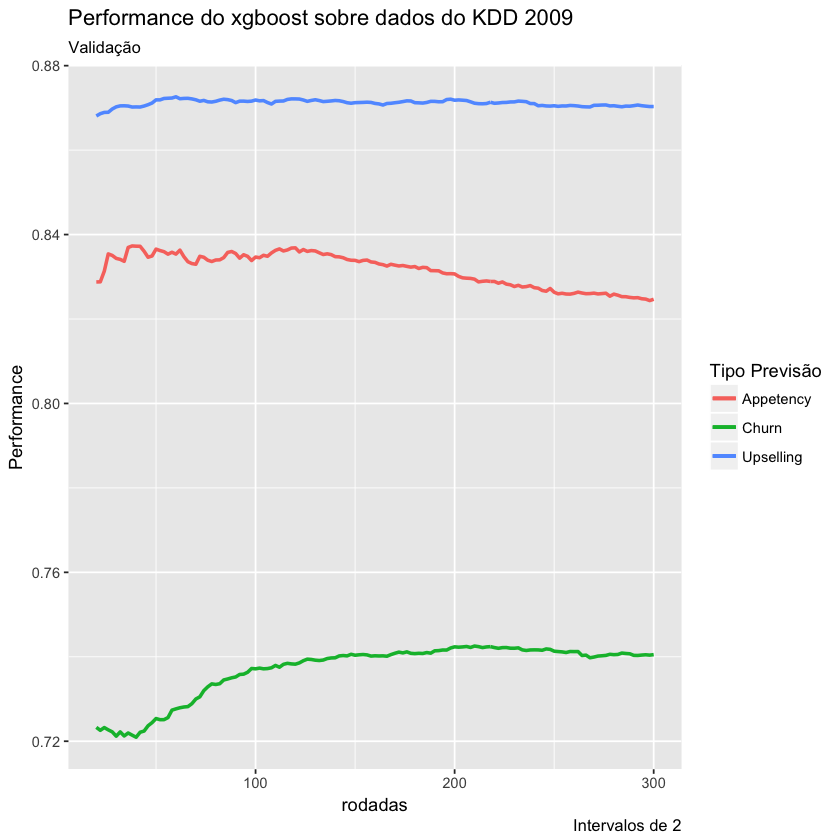

Saving 7 x 7 in image


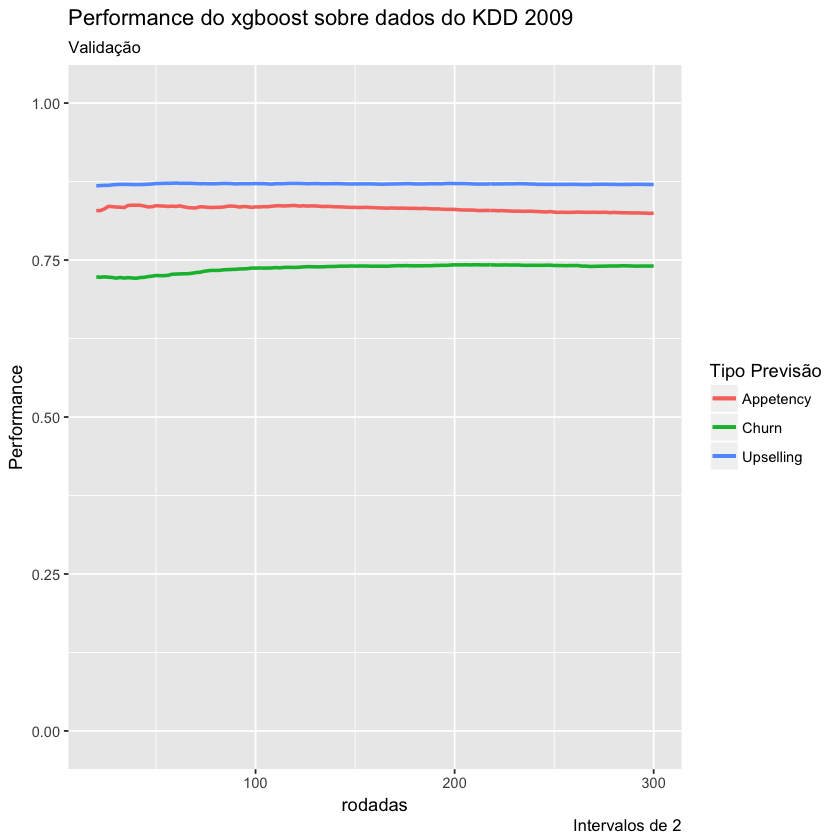

Saving 7 x 7 in image


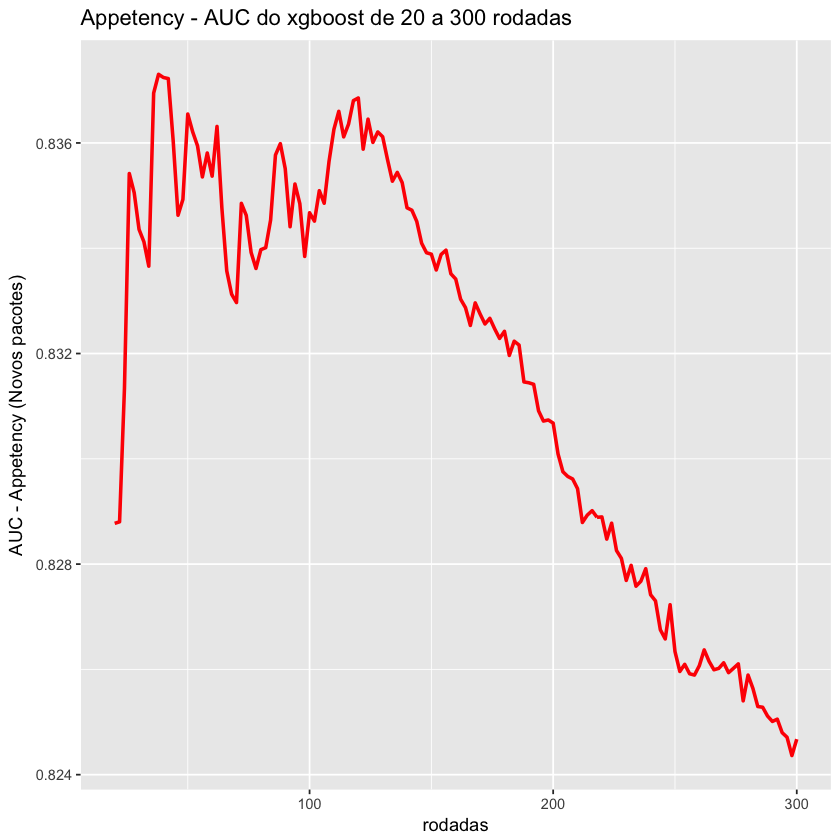

Saving 7 x 7 in image


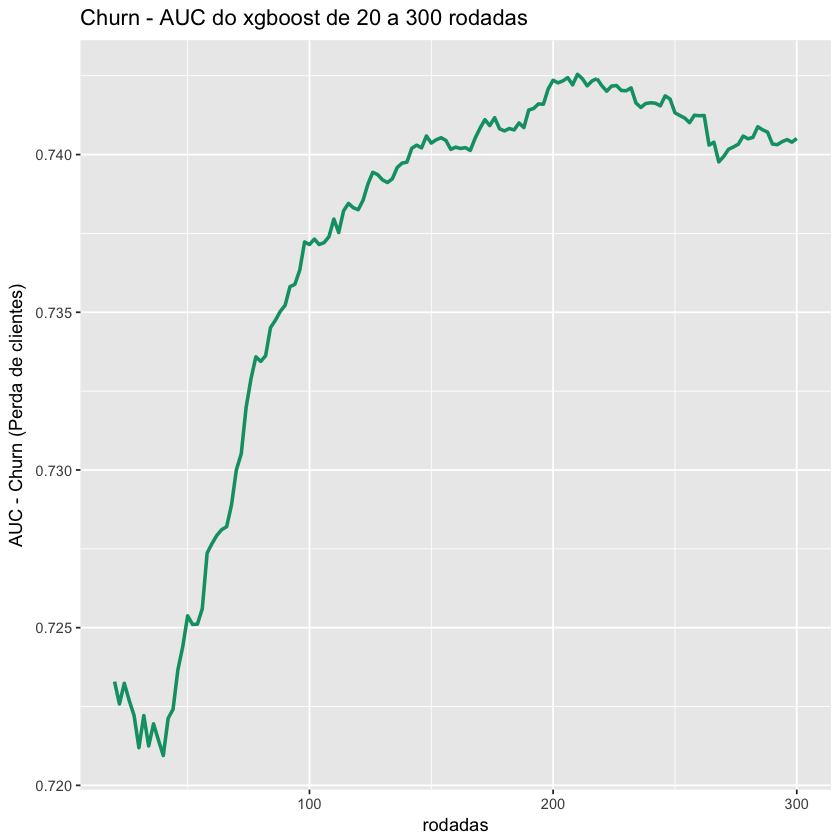

Saving 7 x 7 in image


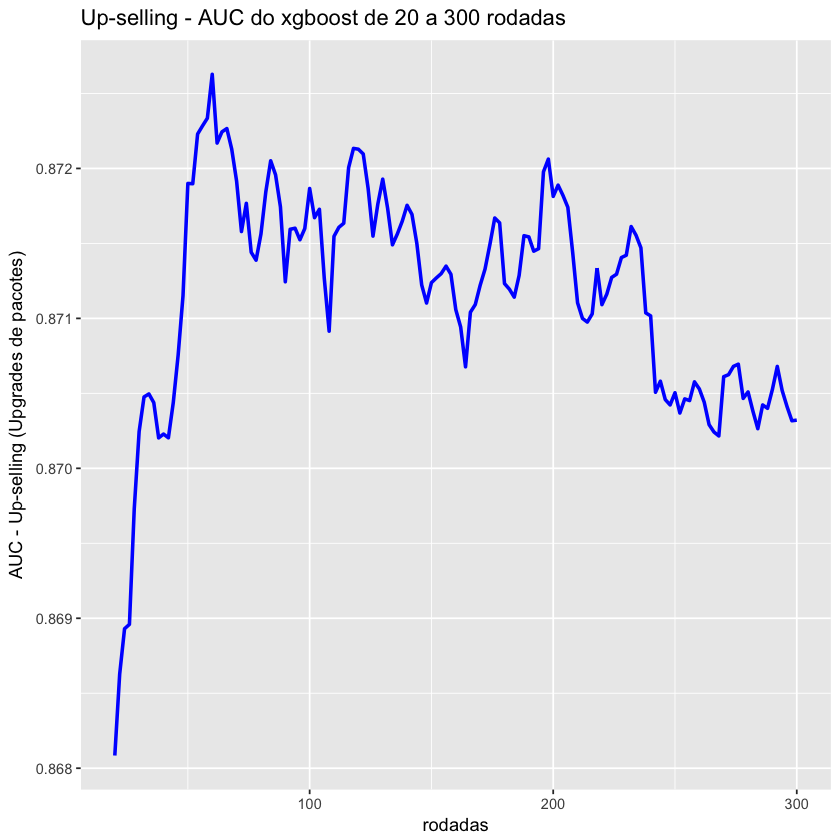

In [26]:
rm(list=c('treinamentoT', 'validacaoT', 'modelo', 'aucValidacao', 'melhor', 'maximo', 'nrounds', 'i',
          'resultado', 'treinamentoTratado', 'indicesTreino', 'inicio', 'nucleos', 'numeroDados', 'numResultado',
          'tamanhoTreino', 'tratamento', 'validacaoTratado', 'vSelecionadas', 'xgbDadosTreinamento'))

performance <- data.frame(listaNRounds, placares[1,], placares[2,], placares[3,])
colnames(performance) <- c('rodadas', resultados)

ggplot(performance, aes(rodadas)) + 
  geom_line(aes(y = appetency, colour = "Appetency"), size=1) + 
  geom_line(aes(y = churn, colour = "Churn"), size=1) +
  geom_line(aes(y = upselling, color = "Upselling"), size=1) +
  labs( y = 'Performance', caption = 'Intervalos de 2',
        title = 'Performance do xgboost sobre dados do KDD 2009',
        subtitle = 'Validação', colour = 'Tipo Previsão')
ggsave("performance.png", plot = last_plot(), device = "png", scale=1)

ggplot(performance, aes(rodadas)) + 
  geom_line(aes(y = appetency, colour = "Appetency"), size=1) + 
  geom_line(aes(y = churn, colour = "Churn"), size=1) +
  geom_line(aes(y = upselling, color = "Upselling"), size=1) +
  labs( y = 'Performance', caption = 'Intervalos de 2',
        title = 'Performance do xgboost sobre dados do KDD 2009',
        subtitle = 'Validação', colour = 'Tipo Previsão') +
  ylim(-0.01, 1.01)
ggsave("performance_0_1.png", plot = last_plot(), device = "png", scale=1)

ggplot(performance, aes(x=rodadas, y=appetency)) +
   geom_line(color="red", size=1) +
   labs( y = 'AUC - Appetency (Novos pacotes)',
         title = 'Appetency - AUC do xgboost de 20 a 300 rodadas')
ggsave("appetency.png", plot = last_plot(), device = "png", scale=1)

ggplot(performance, aes(x=rodadas, y=churn)) +
   geom_line(color="#009E73", size=1) +
   labs( y = 'AUC - Churn (Perda de clientes)',
         title = 'Churn - AUC do xgboost de 20 a 300 rodadas')
   
ggsave("churn.png", plot = last_plot(), device = "png", scale=1)

ggplot(performance, aes(x=rodadas, y=upselling)) +
   geom_line(color="blue", size=1) +
   labs( y = 'AUC - Up-selling (Upgrades de pacotes)',
         title = 'Up-selling - AUC do xgboost de 20 a 300 rodadas')
ggsave("upselling.png", plot = last_plot(), device = "png", scale=1)

# Definições
Pelos gráficos acima vemos que há uma queda de performance do modelo a partir de um determinado número de rodadas do modelo para cada um dos tratamentos. Essa queda não é drástica mas claramente visível nos gráficos isolados de cada métrica.

Para a próxima etapa optamos por manter o número de rodadas como o melhor valor resultante de cada um dos três grupos de simulações. Assim temos:
- Appetency: 38 rodadas, AUC: 0.8373
- Churn: 210 rodadas, AUC: 0.7425
- Upselling: 60 rodadas, AUC: 0.8726

[1] "appetency 0.837304011402973 38 rodadas"


Saving 7 x 7 in image
Saving 7 x 7 in image


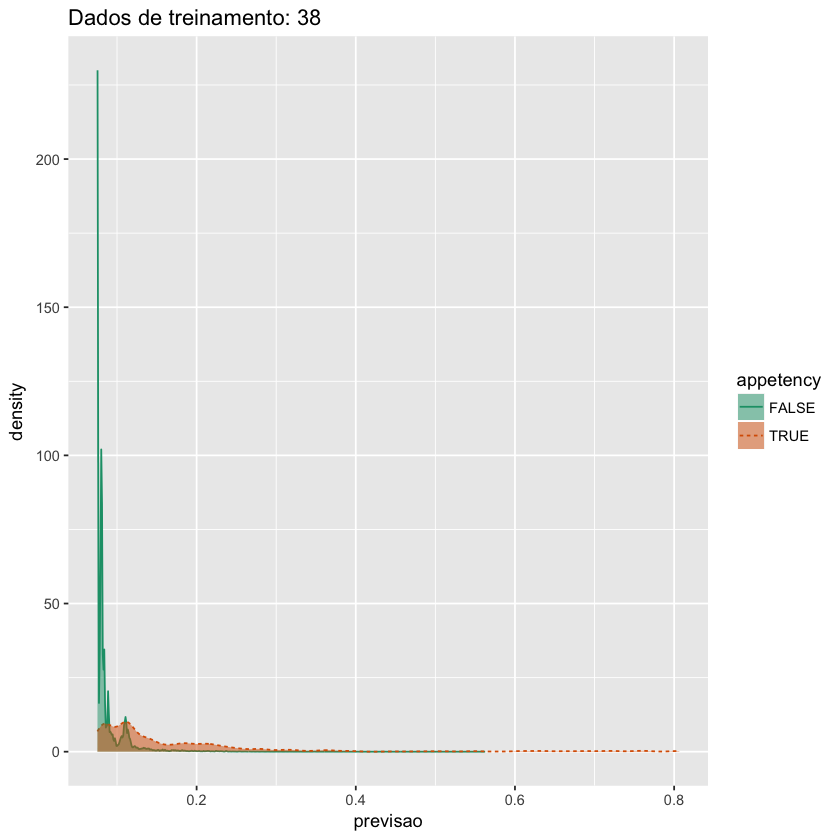

[1] "AUC Treinamento (38): 0.8737"


Saving 7 x 7 in image


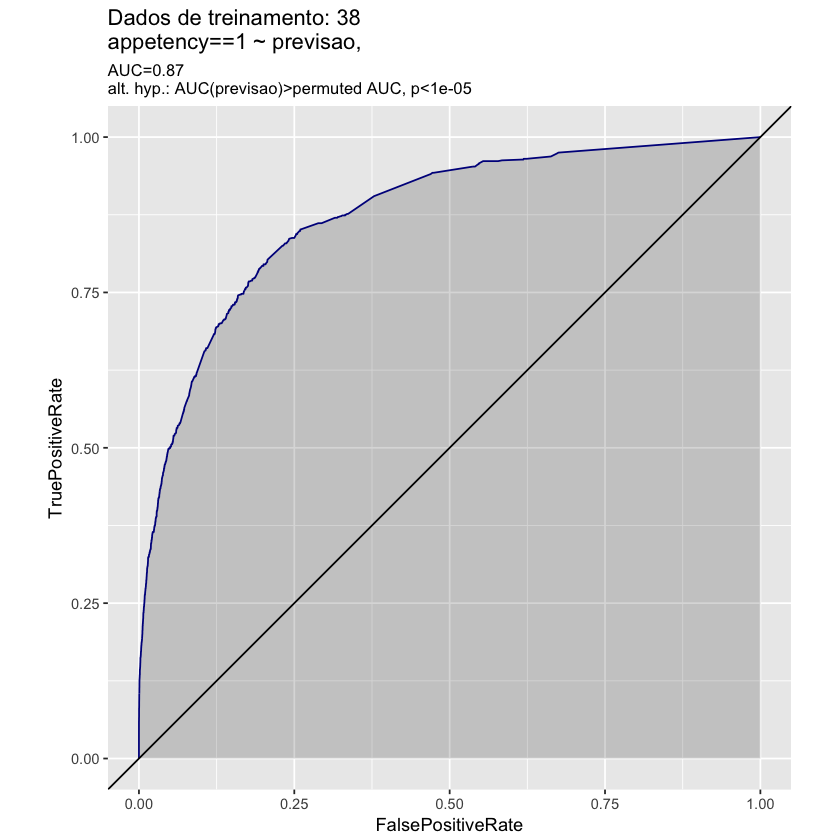

Saving 7 x 7 in image


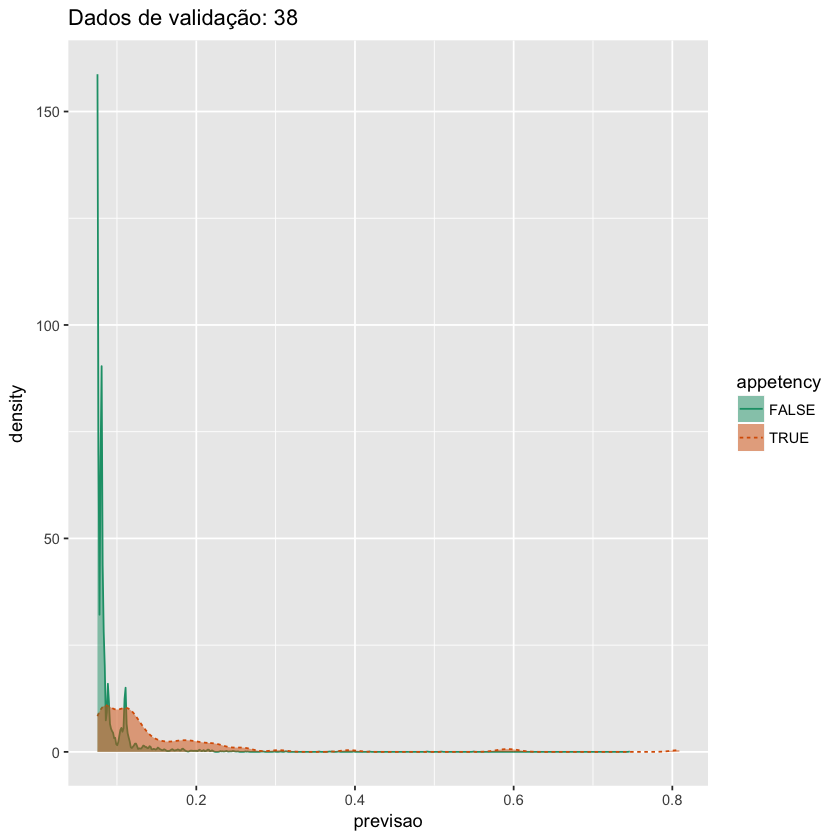

[1] "AUC Validação (38): 0.8373"
[1] "churn 0.742545058480676 210 rodadas"


Saving 7 x 7 in image


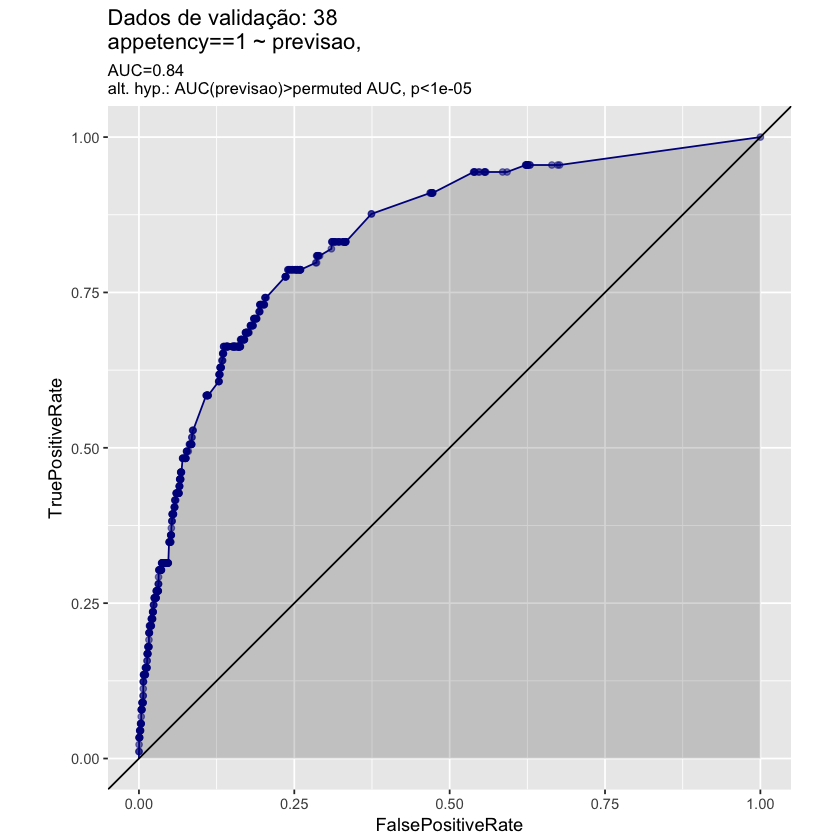

Saving 7 x 7 in image


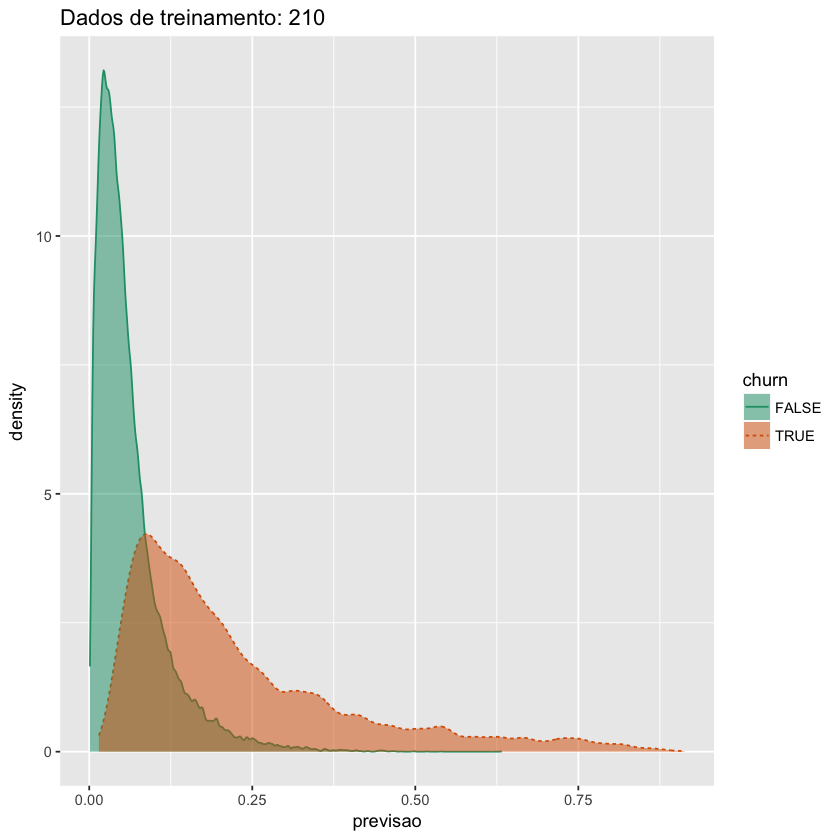

[1] "AUC Treinamento (210): 0.8903"


Saving 7 x 7 in image


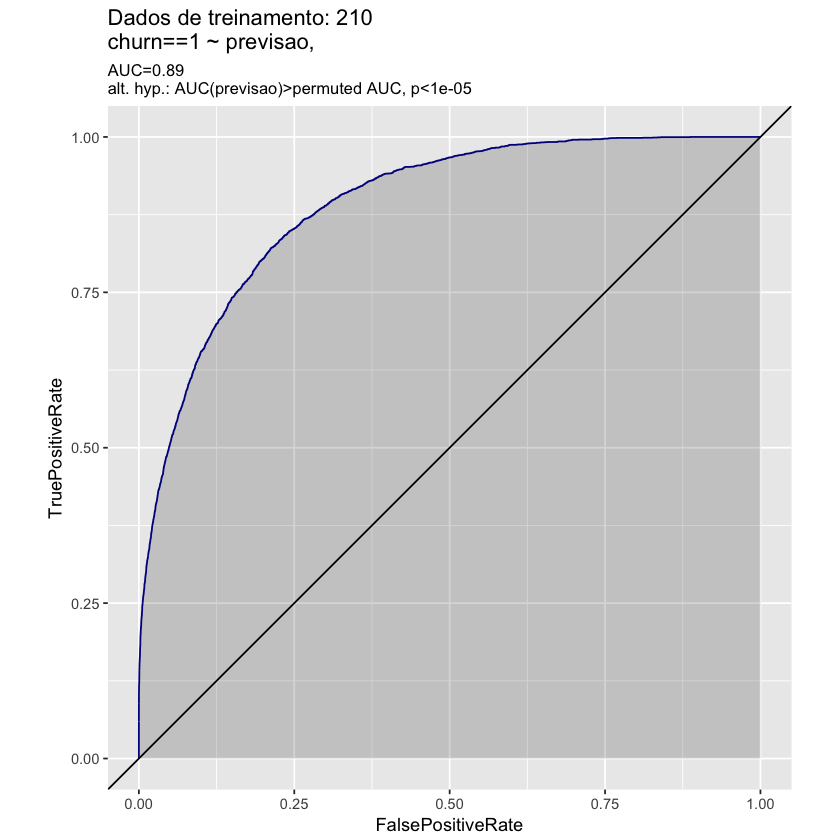

Saving 7 x 7 in image


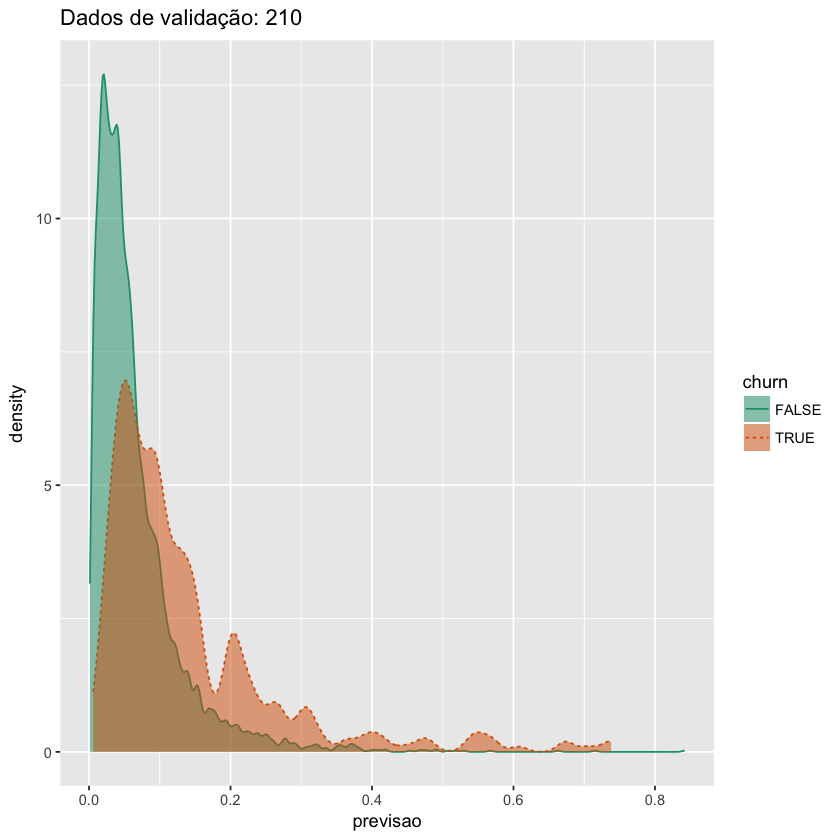

[1] "AUC Validação (210): 0.7425"
[1] "upselling 0.872627887788779 60 rodadas"


Saving 7 x 7 in image


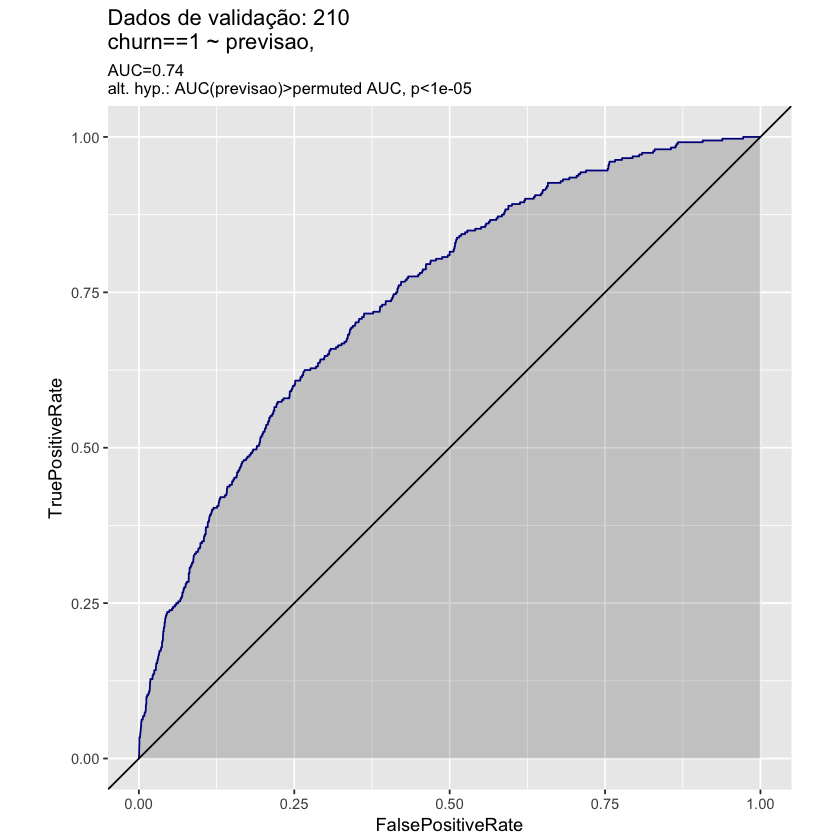

Saving 7 x 7 in image


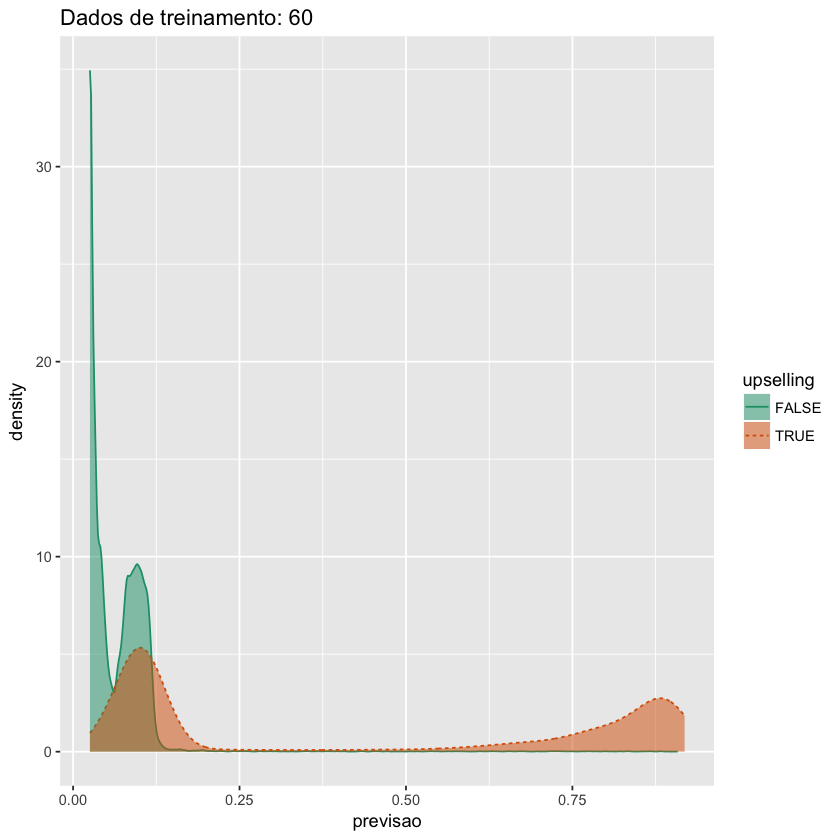

[1] "AUC Treinamento (60): 0.8914"


Saving 7 x 7 in image


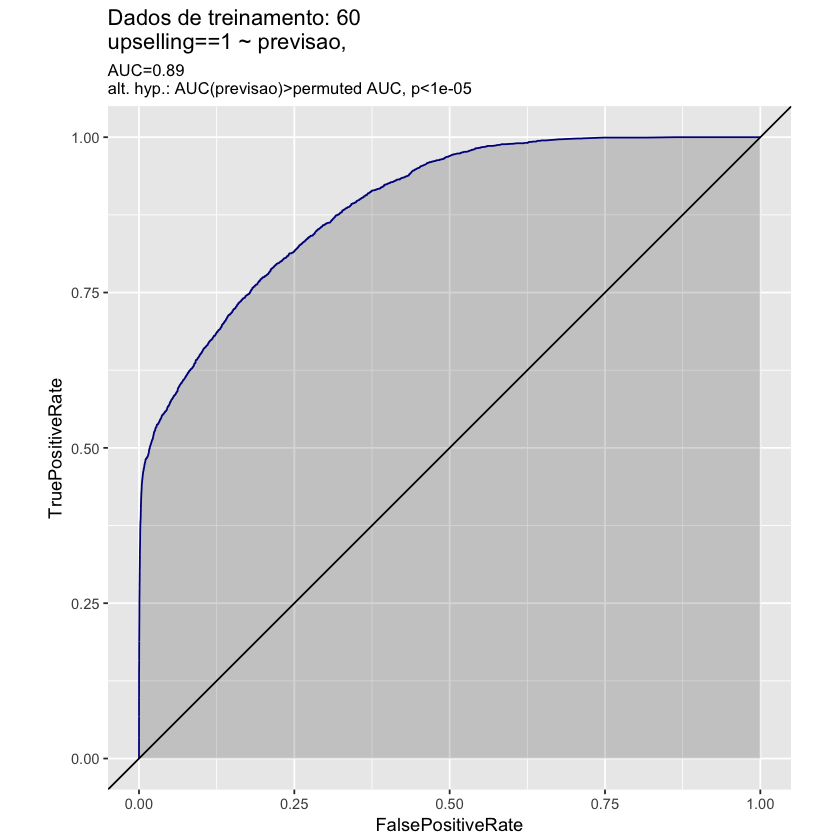

Saving 7 x 7 in image


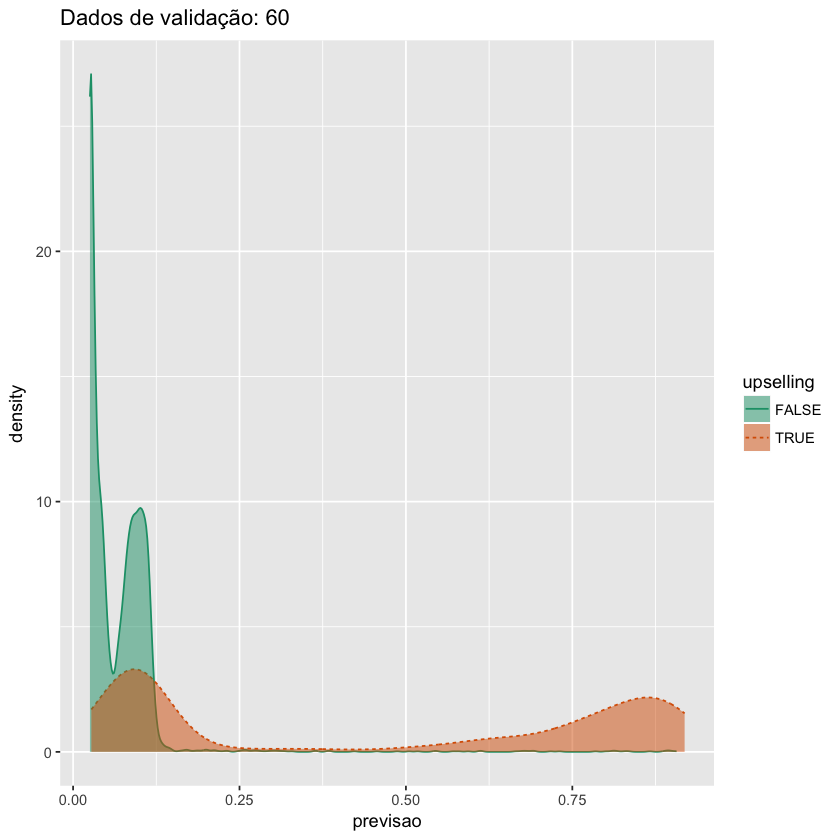

[1] "AUC Validação (60): 0.8726"


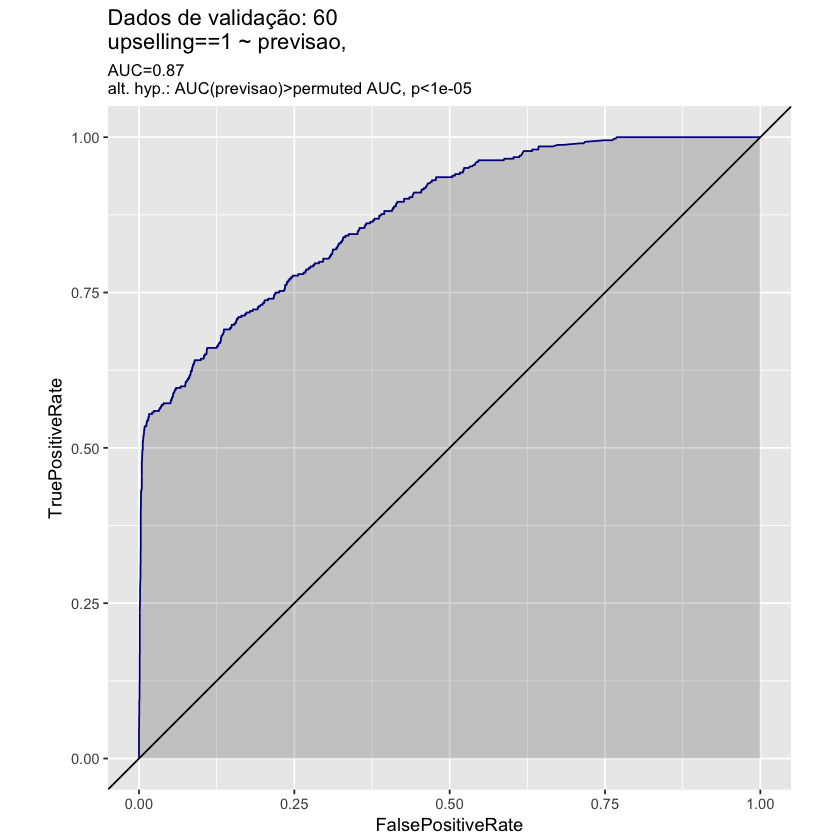

In [27]:
# Com os planos de treinamento definidos anteriormente
# em mãos, executamos outra vez o xgboost para os planos
# de cada label e número de rodadas computados. Plotando
# gráficos de densidade e ROC para os dados de treinamento
# e validação.
# O resultado obtido na validação deve ser um limite máximo
# para a performance nos dados reais, já que é esperada uma
# performance menor nos dados de teste, que não participaram
# da modelagem.

numResultado <- 1

for (resultado in resultados) {
  indice <- which.max(performance[,resultado,drop=T])
  rodadas <- performance$rodadas[indice]
  perfPrevisao <- performance[,resultado][indice]
  print(paste(resultado, perfPrevisao, rodadas, 'rodadas'))

  # Variaveis de treinamento tratadas de acordo com o modelo
  treinamentoTratado <- planosTreinamento[[numResultado]]$crossFrame
    
  # Dados do tratamento
  tratamento <- planosTreinamento[[numResultado]]$treatments

  # Seleciona variaveis de acordo com o corte
  vSelecionadas <- tratamento$scoreFrame$varName[tratamento$scoreFrame$sig<significancia[[numResultado]]]

  # Converte coluna resultado (labels appetency, churn e upselling) para booleano
  treinamentoTratado[[resultado]] <- treinamentoTratado[[resultado]]==objetivo

  # Executa a função de preparação do vtreat com os dados de validação do conjunto de treinamento podando
  # as variaveis de menor significância
  validacaoTratado <- prepare(tratamento,
                              dadosValidacao,
                              pruneSig=significancia[[numResultado]], 
                              parallelCluster=cluster)
  # Converte a coluna de resultado para booleano
  validacaoTratado[[resultado]] <- validacaoTratado[[resultado]]==objetivo

  treinamentoT <- treinamentoTratado[resultado]
  validacaoT <- validacaoTratado[resultado]

  # Prepara dados para o xgb
  xgbDadosTreinamento <- xgb.DMatrix(as.matrix(treinamentoTratado[vSelecionadas]),
                                               label=treinamentoTratado[[resultado]])
  modelo <- xgboost(data=xgbDadosTreinamento,
                    params=params,
                    verbose=0,
                    nrounds=rodadas)

  rodada <- 'previsao'

  treinamentoT[[rodada]] <- as.numeric(predict(modelo, as.matrix(treinamentoTratado[vSelecionadas])))
  validacaoT[[rodada]] <- as.numeric(predict(modelo, as.matrix(validacaoTratado[vSelecionadas])))
    
  print(DoubleDensityPlot(treinamentoT, rodada, resultado, title=paste('Dados de treinamento:', rodadas)))
  ggsave(paste('ddTreinamento-', resultado, '.png', sep=''), plot=last_plot(), scale=1)
  print(ROCPlot(treinamentoT, rodada, resultado, objetivo, title=paste('Dados de treinamento:', rodadas)))
  ggsave(paste('ROCPTreinamento-', resultado, '.png', sep=''), plot=last_plot(), scale=1)

  print(sprintf("AUC Treinamento (%d): %5.4f", rodadas,
                auc(ifelse(treinamentoT[, resultado] == TRUE, 1, 0), treinamentoT[rodada])))
  
  print(DoubleDensityPlot(validacaoT, rodada, resultado, title=paste('Dados de validação:', rodadas)))
  ggsave(paste('ddValidacao-', resultado, '.png', sep=''), plot=last_plot(), scale=1)
  print(ROCPlot(validacaoT, rodada, resultado, objetivo, title=paste('Dados de validação:', rodadas)))
  ggsave(paste('ROCPValidacao-', resultado, '.png', sep=''), plot=last_plot(), scale=1)
    
  aucValidacao <- auc(ifelse(validacaoT[, resultado] == TRUE, 1, 0), validacaoT[rodada])
  print(sprintf("AUC Validação (%d): %5.4f", rodadas, aucValidacao))
    
  numResultado <- numResultado + 1
}

# Gerando rótulos para os dados de teste
Ao fim do processo, utilizamos os tres modelos de tratamento de variáveis do **vtreat** com o modelo de previsão do **XGBoost** para gerar os rótulos dos dados de teste.

Este processo poderia ser executado no loop acima, aproveitando-se do fato dos modelos do **XGBoost** serem os mesmos, porém optamos por executá-lo em separado para tratar questõe de conversão dos dados e geração de arquivos em separado.

In [28]:
numResultado <- 1
teste <- read.table('orange_small_test.data', sep='\t', header=T, na.strings=c(''))

for (resultado in resultados) {
  indice <- which.max(performance[,resultado,drop=T])
  rodadas <- performance$rodadas[indice]
  perfPrevisao <- performance[,resultado][indice]
  print(paste(resultado, perfPrevisao, rodadas, 'rodadas'))

  # Variaveis de treinamento tratadas de acordo com o modelo
  treinamentoTratado <- planosTreinamento[[numResultado]]$crossFrame
    
  # Dados do tratamento
  tratamento <- planosTreinamento[[numResultado]]$treatments

  # Seleciona variaveis de acordo com o corte
  vSelecionadas <- tratamento$scoreFrame$varName[tratamento$scoreFrame$sig<significancia[[numResultado]]]

  # Converte coluna resultado (labels appetency, churn e upselling) para booleano
  treinamentoTratado[[resultado]] <- treinamentoTratado[[resultado]]==objetivo

  # Executa a função de preparação do vtreat com os dados de teste podando
  # as variaveis de menor significância
  testeTratado <- prepare(tratamento,
                          teste,
                          pruneSig=significancia[[numResultado]], 
                          parallelCluster=cluster)

  # Prepara dados para o xgb
  xgbDadosTreinamento <- xgb.DMatrix(as.matrix(treinamentoTratado[vSelecionadas]),
                                               label=treinamentoTratado[[resultado]])
  modelo <- xgboost(data=xgbDadosTreinamento,
                    params=params,
                    verbose=0,
                    nrounds=rodadas)

  teste[resultado] <- as.numeric(predict(modelo, as.matrix(testeTratado[vSelecionadas])))
  numResultado <- numResultado + 1
}

# Para o cluster de sockets, já que não vamos fazer mais chamadas ao vtreat
parallel::stopCluster(cluster)
cluster <- NULL

[1] "appetency 0.837304011402973 38 rodadas"
[1] "churn 0.742545058480676 210 rodadas"


Warning message in prepare(tratamento, teste, pruneSig = significancia[[numResultado]], :
“variable Var37 expected type/class integer integer saw  double numeric”Warning message in prepare(tratamento, teste, pruneSig = significancia[[numResultado]], :
“variable Var162 expected type/class double numeric saw  integer integer”Warning message in prepare(tratamento, teste, pruneSig = significancia[[numResultado]], :
“variable Var182 expected type/class integer integer saw  double numeric”

[1] "upselling 0.872627887788779 60 rodadas"


Warning message in prepare(tratamento, teste, pruneSig = significancia[[numResultado]], :
“variable Var37 expected type/class integer integer saw  double numeric”Warning message in prepare(tratamento, teste, pruneSig = significancia[[numResultado]], :
“variable Var162 expected type/class double numeric saw  integer integer”Warning message in prepare(tratamento, teste, pruneSig = significancia[[numResultado]], :
“variable Var182 expected type/class integer integer saw  double numeric”

# Mensagens de Warning na função prepare
Verificamos mensagens de warning na chamada da função prepare para as variáveis Var37, Var162 e Var182. As tres variáveis possuem uma grande quantidade de NA's, como mostrado abaixo.

A princípio essas mensagens não impedem que a função `prepare` condicione as variáveis do dataset de teste, porém vale a pena investigar com mais cuidado as razões e o impacto destas mensagem na capacidade preditiva do modelo.

In [29]:
summary(teste[c('Var37', 'Var162', 'Var182')])

     Var37              Var162            Var182        
 Min.   :       0   Min.   :      0   Min.   :       0  
 1st Qu.:       0   1st Qu.:      0   1st Qu.:       0  
 Median :       0   Median :      0   Median :  168228  
 Mean   :  637029   Mean   : 377111   Mean   : 1476624  
 3rd Qu.:  658766   3rd Qu.: 209214   3rd Qu.: 1906000  
 Max.   :11216520   Max.   :8878005   Max.   :12201540  
 NA's   :48362      NA's   :48716     NA's   :48362     

# Salvando as previsões
As previsões do modelo foram salvas nos arquivos:
- `orange_small_test_appetency.labels`: Appetency
- `orange_small_test_churn.labels`: Churn
- `orange_small_test_upselling.labels`: Upselling

codificando negativo como -1 e positivo como 1.

In [30]:
for (resultado in resultados) {
    teste[resultado] <- ifelse(teste[resultado] <= 0.5, -1, 1)
    write.table(teste[resultado], file = paste("orange_small_test_", resultado, ".labels", sep=''),
                append = FALSE, quote = FALSE,
                row.names = FALSE, col.names = FALSE)
}